In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [4]:
PARAMS_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Phenobottle Parameters Chapter 4\\"
OUTPUT_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data"

In [5]:
bottles = ["1", "2", "3", "4", "6", "7", "8", "9", "10"]
features = ["Y(II)", "Y(NPQ)", "Y(NO)", "NPQ", "qN", "qP", "qL"]  
reps = ["1", "2", "3", "4", "5"]
temp_df = []
for rep in reps:
    for bottle in bottles:
        LC_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Light Curves (MC-PAM)\\Day5 Rep{}\\".format(rep)
        try:
            lc_data = pd.read_csv(LC_DIR + "PB{}.csv".format(bottle), sep=";", encoding='cp1252')
        except:
            lc_data = pd.read_csv(LC_DIR + "PB{}.csv".format(bottle), sep=",", encoding='cp1252')

        x = lc_data.loc[:, features].values[4:-2]
        lc_dataframe = pd.DataFrame(x, columns=features)
        
        lc_dataframe['Bottle_Num'] = pd.Series(np.repeat(bottle, len(lc_dataframe["Y(II)"])), index=lc_dataframe.index)
        
    
        temp_df.append(lc_dataframe)
        lc_dataframe['Rep'] = pd.Series(np.repeat(rep, len(lc_dataframe["Y(II)"])), index=lc_dataframe.index)
    
comb_df = pd.concat(temp_df)
comb_df

,Y(II),Y(NPQ),Y(NO),NPQ,qN,qP,qL,Bottle_Num,Rep
0,0.692,0.006,0.302,0.020,0.026,0.974,0.916,1,1
1,0.696,0.004,0.300,0.014,0.018,0.976,0.921,1,1
2,0.657,0.007,0.336,0.022,0.028,0.923,0.777,1,1
3,0.541,0.014,0.445,0.032,0.040,0.763,0.484,1,1
4,0.491,0.028,0.481,0.058,0.070,0.698,0.406,1,1
...,...,...,...,...,...,...,...,...,...
14,0.226,0.117,0.657,0.179,0.193,0.335,0.140,10,5
15,0.191,0.121,0.688,0.176,0.190,0.282,0.113,10,5
16,0.157,0.125,0.717,0.174,0.189,0.233,0.090,10,5
17,0.131,0.130,0.739,0.175,0.190,0.194,0.072,10,5


In [12]:
x = comb_df.loc[:, features].values
y = comb_df.loc[:, ["Bottle_Num"]].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
pricncipalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=pricncipalComponents, columns=["PC1", "PC2"])
principalDf.reset_index(drop=True, inplace=True)
comb_df.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, comb_df[["Bottle_Num", "Rep"]]], axis=1)
finalDf.head(25)

,PC1,PC2,Bottle_Num,Rep
0,-4.167369,0.212947,1,1
1,-4.294893,0.339085,1,1
2,-3.703168,0.470504,1,1
3,-2.342625,1.069765,1,1
4,-1.468437,0.754836,1,1
5,-0.972577,0.138542,1,1
6,-0.569574,-0.493845,1,1
7,-0.275496,-0.928942,1,1
8,0.109906,-1.168416,1,1
9,0.638206,-1.185784,1,1


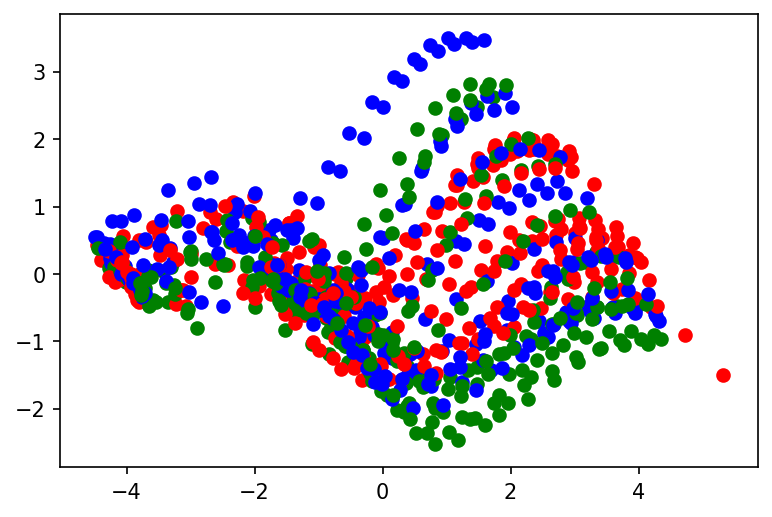

In [13]:
fig, ax = plt.subplots(dpi=150)
for i in range(len(finalDf)):
    if finalDf["Bottle_Num"][i] == "1" or finalDf["Bottle_Num"][i] == "2" or finalDf["Bottle_Num"][i] == "3":
        ax.scatter(finalDf["PC1"][i], finalDf["PC2"][i], c="r")
    if finalDf["Bottle_Num"][i] == "6" or finalDf["Bottle_Num"][i] == "7" or finalDf["Bottle_Num"][i] == "8":
        ax.scatter(finalDf["PC1"][i], finalDf["PC2"][i], c="b")
    if finalDf["Bottle_Num"][i] == "4" or finalDf["Bottle_Num"][i] == "9" or finalDf["Bottle_Num"][i] == "10":
        ax.scatter(finalDf["PC1"][i], finalDf["PC2"][i], c="g")

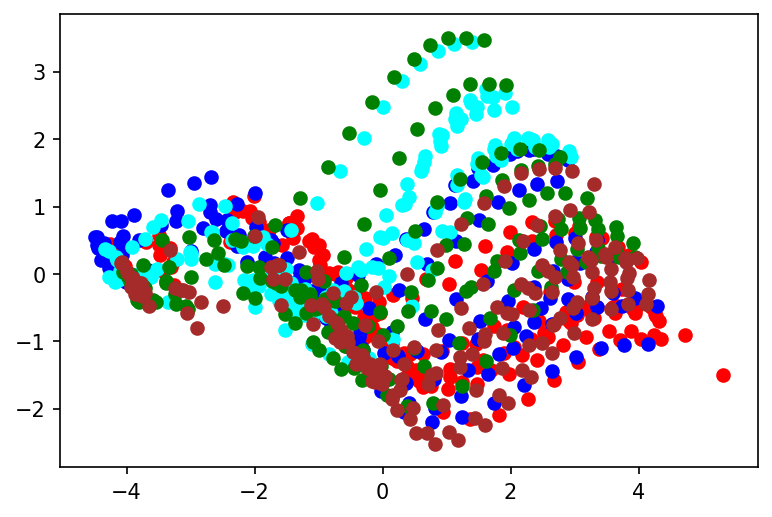

In [14]:
fig, ax = plt.subplots(dpi=150)
for i in range(len(finalDf)):
    if finalDf["Rep"][i] == "1":
        ax.scatter(finalDf["PC1"][i], finalDf["PC2"][i], c="r")
    if finalDf["Rep"][i] == "2":
        ax.scatter(finalDf["PC1"][i], finalDf["PC2"][i], c="b")   
    if finalDf["Rep"][i] == "3":
        ax.scatter(finalDf["PC1"][i], finalDf["PC2"][i], c="cyan")
    if finalDf["Rep"][i] == "4":
        ax.scatter(finalDf["PC1"][i], finalDf["PC2"][i], c="green")
    if finalDf["Rep"][i] == "5":
        ax.scatter(finalDf["PC1"][i], finalDf["PC2"][i], c="brown")

In [15]:
sum(pca.explained_variance_ratio_)

0.9864535792830046

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

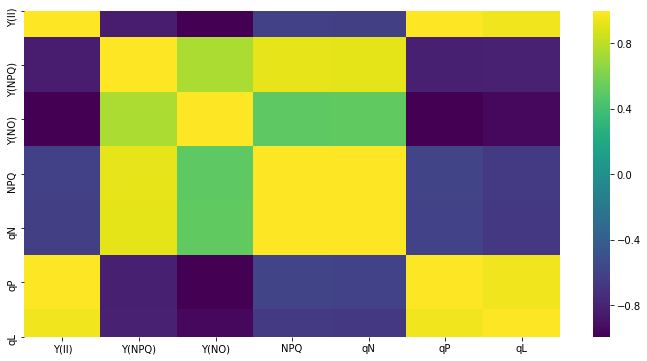

In [16]:
plt.figure(figsize=(12,6))
s = sns.heatmap(comb_df[features].corr(),cmap='viridis')
plt.show()